In [ ]:
# import os

# # folder_name = "/media/ssudhakar/DATA_10TB/data_solver/"
# # for i in range(1, 7):
# #     for j in range(2, 4):
# #         for k in range(2, 4):
# #             os.makedirs(f"{folder_name}/case1_{i}{j}{k}", exist_ok=True)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

run_num = 131
grid_size = 1025
colnames_df =  ["time"] + [f"col{col_num:04d}" for col_num in range(1, grid_size+2)]

data_folder = f"/media/ssudhakar/DATA_10TB/data_solver/gaussian_ignition_1024/" #/case1_{run_num}/"
imgs_folder = f"/media/ssudhakar/DATA_10TB/data_solver/plots_case1/"

df_output_sol_u = pd.read_csv(f"{data_folder}output_sol_u_{run_num}.csv", header=None, names=colnames_df)
df_output_sol_dens = pd.read_csv(f"{data_folder}output_sol_dens_{run_num}.csv", header=None, names=colnames_df)
df_output_sol_temp = pd.read_csv(f"{data_folder}output_sol_temp_{run_num}.csv", header=None, names=colnames_df)
df_output_sol_pres = pd.read_csv(f"{data_folder}output_sol_pres_{run_num}.csv", header=None, names=colnames_df)
df_output_sol_h2 = pd.read_csv(f"{data_folder}output_sol_h2_{run_num}.csv", header=None, names=colnames_df)
df_output_sol_oh = pd.read_csv(f"{data_folder}output_sol_oh_{run_num}.csv", header=None, names=colnames_df)

u_vel = df_output_sol_u.iloc[:, 1:(grid_size+1)].values
dens = df_output_sol_dens.iloc[:, 1:(grid_size+1)].values
temp = df_output_sol_temp.iloc[:, 1:(grid_size+1)].values
pres = df_output_sol_pres.iloc[:, 1:(grid_size+1)].values
h2vals = df_output_sol_h2.iloc[:, 1:(grid_size+1)].values
ohvals = df_output_sol_oh.iloc[:, 1:(grid_size+1)].values


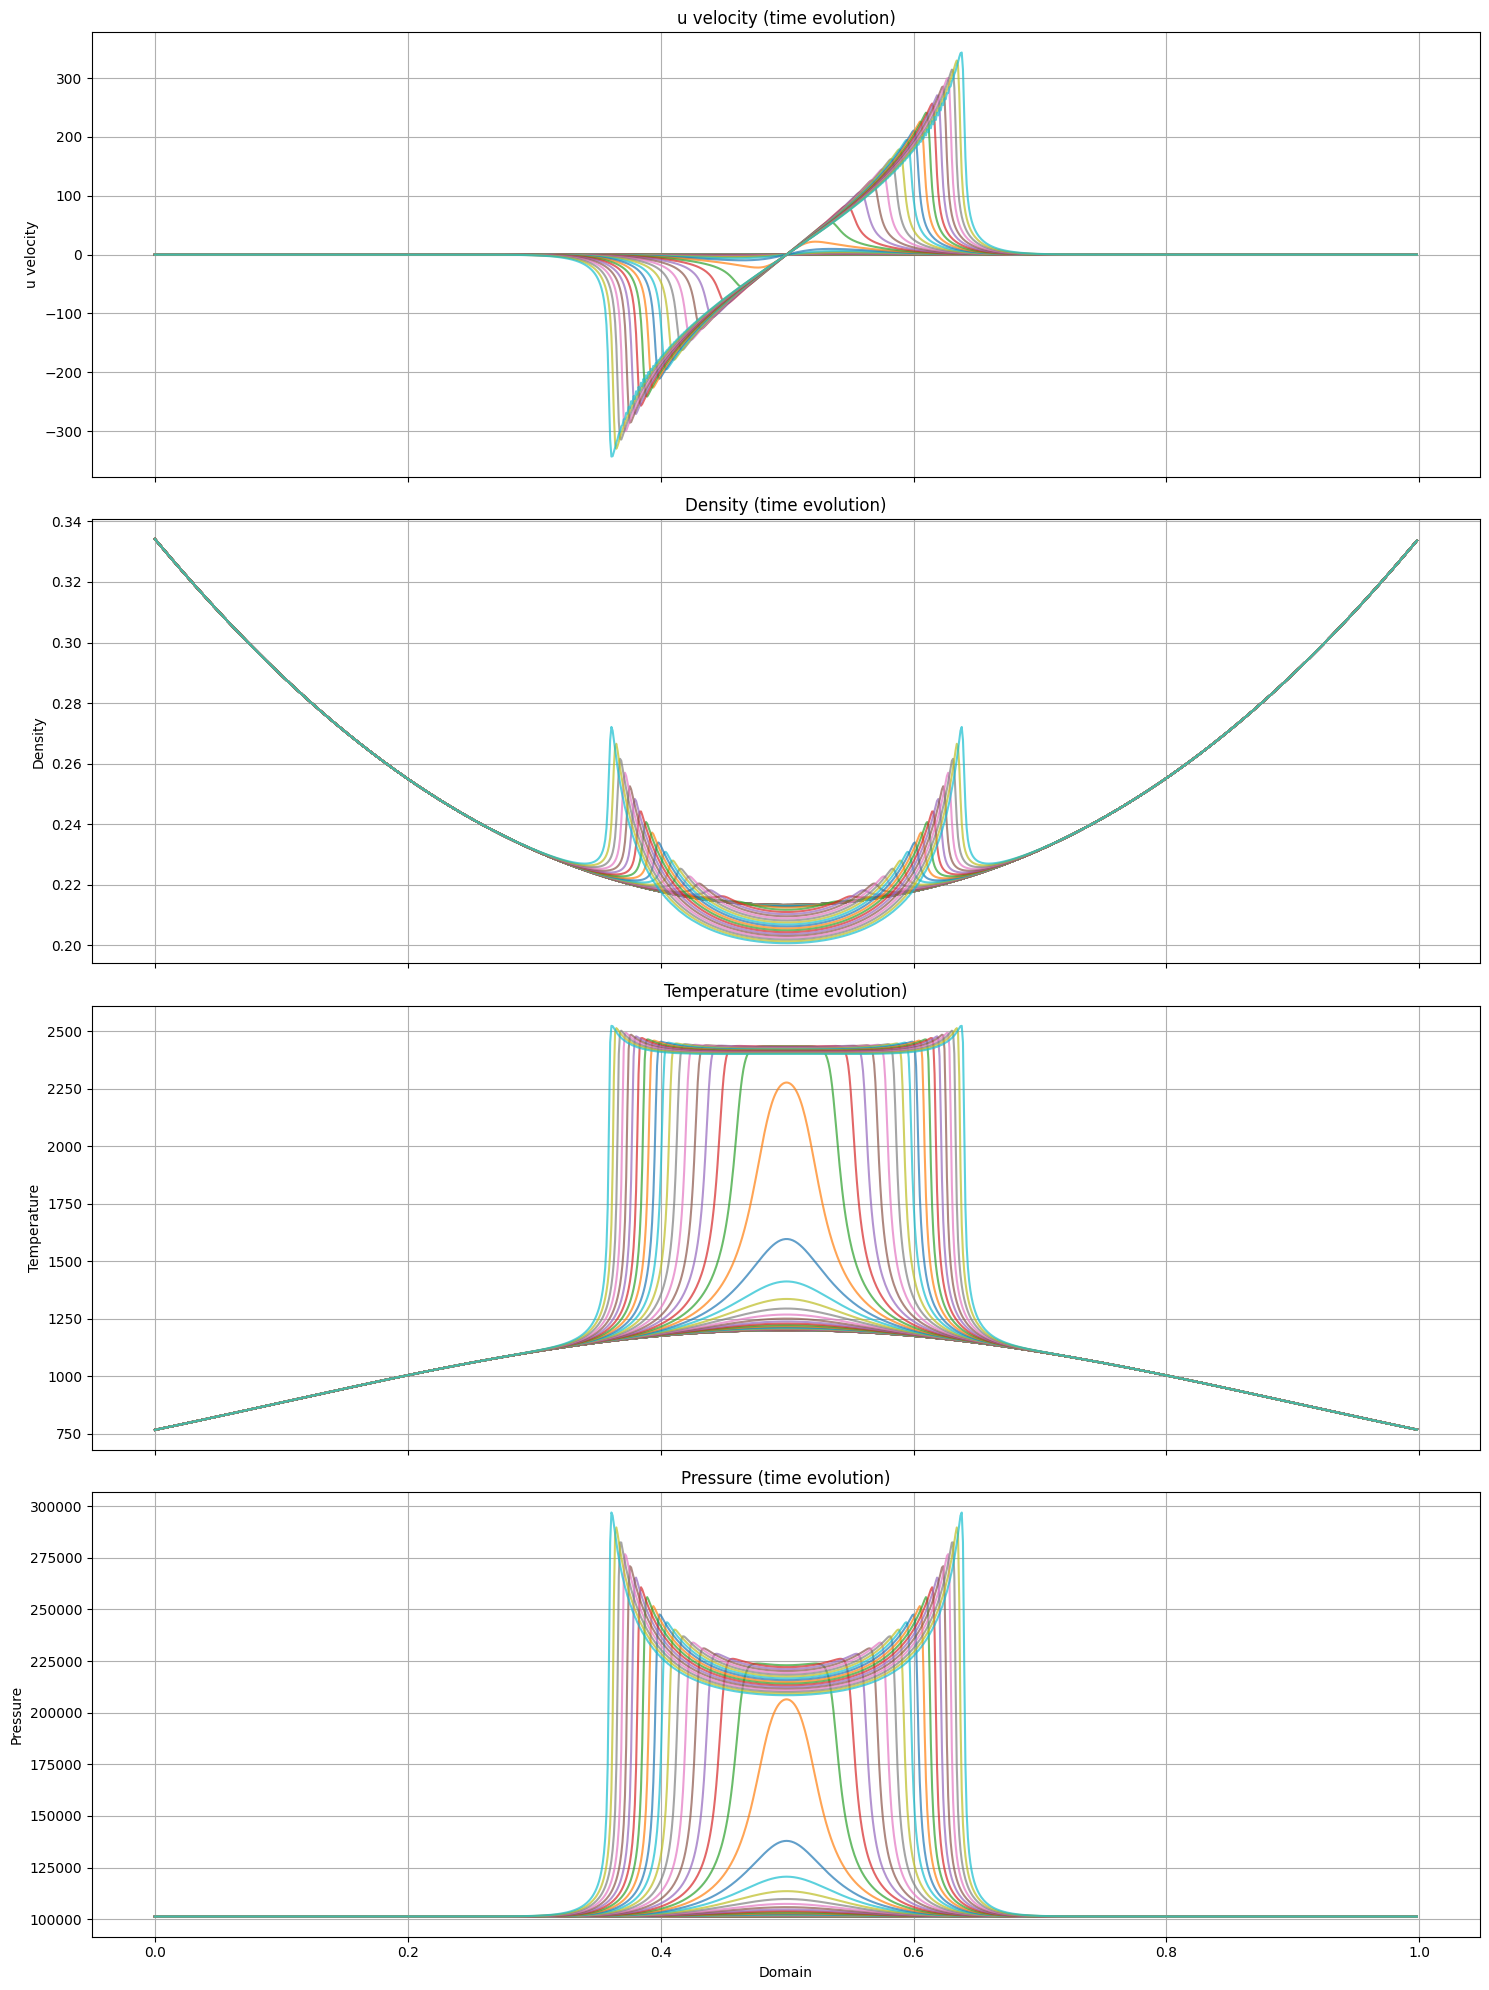

In [86]:
# Assuming x, u_vel, dens, temp, pres, grid_size are defined
x = np.linspace(0, 1, grid_size, endpoint=False)  # Adjusted to use grid_size

# Create figure and subplot axes (4 rows, 1 column)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), sharex=True)

# Data and labels for each subplot
data_vars = [u_vel, dens, temp, pres]
titles = ['u velocity (time evolution)', 'Density (time evolution)', 'Temperature (time evolution)', 'Pressure (time evolution)']
y_labels = ['u velocity', 'Density', 'Temperature', 'Pressure']

# Plot each variable in its respective subplot
for ax, data, title, ylabel in zip(axes, data_vars, titles, y_labels):
    for i in range(0, 700, 10):
        ax.plot(x, data[i, :], alpha=0.7, ) #label=f"{i * 1000 * 5e-9:.2e}")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)
    # ax.legend(loc='upper left')

# Set common x-label for the bottom subplot
axes[-1].set_xlabel('Domain')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [80]:
temp_time = temp[:, 32]
h2vals_time = h2vals[:, 32]
ohvals_time = ohvals[:, 32]

dt = 0.00000002 * 1000 #5e-9 * 1000
time_vals = np.arange(0, dt*500, dt)

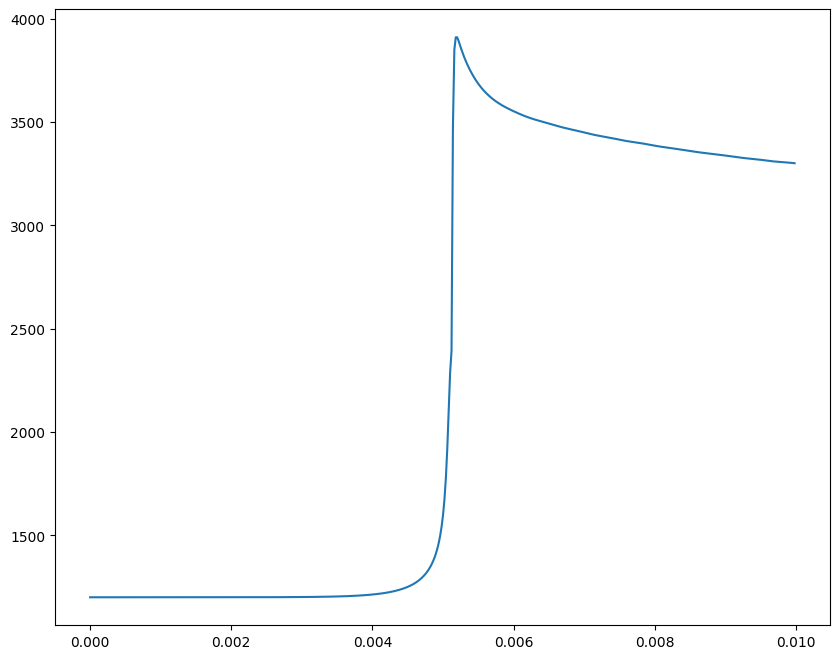

In [81]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(time_vals, temp_time) 
# ax.plot(time_vals, h2vals_time) 
# ax.plot(time_vals, ohvals_time) 

plt.show()